<a href="https://colab.research.google.com/github/mflavioep/UnivespPJI410/blob/main/PJI410_Notebook_02_Tratamento_e_interpreta%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NOTEBOOK 02 - Tratamento, limpeza, observação e interpretação dos dados***

*   DATA: 28/05/2023
*   Arquivo: PJI410 Notebook 02 - Tratamento e interpretação dos dados.ipynb
*   Disponível em: https://github.com/mflavioep/UnivespPJI410



**UNIVERSIDADE VIRTUAL DO ESTADO DE SÃO PAULO**

**Disciplina:** Projeto Integrador em Computação IV 

**Tema:** Controle de rotatividade de estacionamento de estabelecimento comercial com promoções integradas com Inteligência Artificial agregada. 

**Integrantes:**
*   Goldenberg Ferreira Vieira, RA: 2006475
*   Marcos Chiorato, RA: 2001027
*   Marcos Flávio Eli Pereira, RA: 2012284 
*   William Domingos da Silva, RA: 2009717

**Polos:** Americana, Jaguariúna, Várzea Paulista, Sumaré

**Orientador do PI:** Lucas Campos Ferreira 




**Bibliotecas** **utilizadas**

In [1]:
# Bibliotecas utilizadas para a análise

# Pandas 
# https://pandas.pydata.org/
import pandas as pd

# Numpy
# https://numpy.org/
import numpy as np

# Matplotlib 
# https://matplotlib.org/
import matplotlib.pyplot as plt

import datetime as dt

In [2]:
#Caminho para o arquivo contendo os dados obtidos, no formato de texto separado por vírgula (CSV)
url = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS.csv'

In [3]:
# Faz o leitura do arquivo de dados no formato CSV e converte em uma DataFrame Pandas
estacionamento = pd.read_csv(url)

In [4]:
# Exibe as 20 primeiras linhas do DataFrame
estacionamento.head(20)

,hora_entrada,permanencia
0,2023-03-13 08:15:03.125890,14
1,2023-03-13 08:15:56.828889,28
2,2023-03-13 08:17:43.397389,23
3,2023-03-13 08:18:23.504707,25
4,2023-03-13 08:18:26.604436,16
5,2023-03-13 08:19:28.080251,24
6,2023-03-13 08:19:54.998022,38
7,2023-03-13 08:20:50.448296,18
8,2023-03-13 08:20:51.299927,39
9,2023-03-13 08:21:11.671458,21


In [5]:
# Informações sobre o DataFrame
estacionamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9627 entries, 0 to 9626
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hora_entrada  9627 non-null   object
 1   permanencia   9627 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 150.5+ KB


In [6]:
# Análise descritiva dos dados
estacionamento.describe()

,permanencia
count,9627.000000
mean,25.267685
std,9.532982
min,5.000000
25%,18.000000
50%,25.000000
75%,32.000000
max,65.000000


Neste ponto já extraímos algumas informações interessantes:
*   Uso de Voucher, metade dos usuários utilizaram
*   O tempo médio de permanência no estacionamento é de 18 minutos
*   Tempo Máximo no estabelecimento foi de 54 minutos
*   Tempo Mínimo no estabelecimento foi de 5 minutos

In [7]:
# Convertendo as datas no tipo Pandas.
estacionamento['hora_entrada'] = pd.to_datetime(estacionamento['hora_entrada'])

In [8]:
estacionamento.groupby("permanencia")["permanencia"].count()


permanencia
5      34
6      51
7      80
8     118
9     144
10    138
11    154
12    202
13    212
14    224
15    236
16    276
17    286
18    323
19    311
20    318
21    355
22    379
23    381
24    401
25    365
26    401
27    396
28    330
29    354
30    326
31    341
32    307
33    294
34    267
35    223
36    215
37    186
38    181
39    139
40    104
41     96
42     86
43     72
44     71
45     41
46     44
47     42
48     23
49     20
50     14
51     19
52     16
53      6
54     10
55      4
56      4
57      4
60      1
64      1
65      1
Name: permanencia, dtype: int64

In [9]:
estacionamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9627 entries, 0 to 9626
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   hora_entrada  9627 non-null   datetime64[ns]
 1   permanencia   9627 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 150.5 KB


In [10]:
x = estacionamento['hora_entrada']
y = estacionamento['permanencia']

In [11]:
x.head(2)
y.head(2)

0    14
1    28
Name: permanencia, dtype: int64

Text(0.5, 1.0, 'Distribuição do tempo de permanência no estabelecimento por semana')

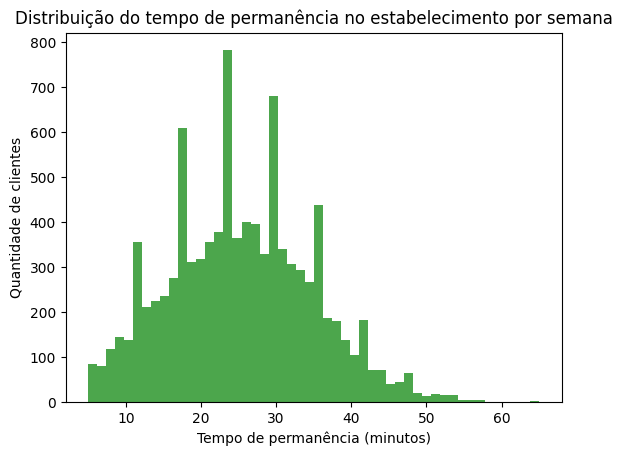

In [12]:
plt.hist(y, bins=50, alpha=0.7, color='green')
plt.xlabel('Tempo de permanência (minutos)')
plt.ylabel('Quantidade de clientes') 
plt.title('Distribuição do tempo de permanência no estabelecimento por semana')

Cálculo da ocupação das vagas do estacionamento, utilizando a divisão de uma hora por 4, ou seja, divido em blocos de 15 minutos

In [13]:
estacionamento['entrada_data'] = pd.to_datetime(estacionamento['hora_entrada']).dt.date
estacionamento['entrada_hora'] = pd.to_datetime(estacionamento['hora_entrada']).dt.hour
estacionamento['entrada_minuto'] = pd.to_datetime(estacionamento['hora_entrada']).dt.minute

In [14]:
estacionamento

,hora_entrada,permanencia,entrada_data,entrada_hora,entrada_minuto
0,2023-03-13 08:15:03.125890,14,2023-03-13,8,15
1,2023-03-13 08:15:56.828889,28,2023-03-13,8,15
2,2023-03-13 08:17:43.397389,23,2023-03-13,8,17
3,2023-03-13 08:18:23.504707,25,2023-03-13,8,18
4,2023-03-13 08:18:26.604436,16,2023-03-13,8,18
...,...,...,...,...,...
9622,2023-03-19 21:17:57.847398,20,2023-03-19,21,17
9623,2023-03-19 21:26:45.557526,45,2023-03-19,21,26
9624,2023-03-19 21:27:46.071175,27,2023-03-19,21,27
9625,2023-03-19 21:28:43.693136,26,2023-03-19,21,28


In [15]:
estacionamento['saida_hora'] = estacionamento['entrada_hora']

In [16]:
estacionamento['saida_minuto'] = estacionamento['entrada_minuto'] + estacionamento['permanencia']

In [17]:
def map_minutos(minutos):
  if minutos >= 60:
    return minutos - 60
  else:
    return minutos

def map_horas(minutos):
  if minutos >= 60:
    return 1
  else:
    return 0

def map_quartil(minutos):
  if minutos >= 45:
    return 45
  elif minutos >= 30:
    return 30
  elif minutos >= 15:
    return 15
  else:
    return 0      

In [18]:
estacionamento['saida_hora'] = estacionamento['saida_hora'] + estacionamento["saida_minuto"].apply(lambda x: map_horas(x))
estacionamento['saida_minuto'] = estacionamento["saida_minuto"].apply(lambda x: map_minutos(x))

In [19]:
estacionamento['entrada_quartil'] = estacionamento["entrada_minuto"].apply(lambda x: map_quartil(x))
estacionamento['saida_quartil'] = estacionamento["saida_minuto"].apply(lambda x: map_quartil(x))

In [20]:

# Using + operator to combine two columns
# df["Period"] = df['Courses'].astype(str) +"-"+ df["Duration"]
estacionamento['hora_entrada_n'] = estacionamento['entrada_data'].astype(str)+" "+estacionamento["entrada_hora"].astype(str)+":"+estacionamento["entrada_quartil"].astype(str) 
estacionamento['hora_saida_n'] = estacionamento['entrada_data'].astype(str)+" "+estacionamento["saida_hora"].astype(str)+":"+estacionamento["saida_quartil"].astype(str) 

estacionamento['hora_entrada_n'] = pd.to_datetime(estacionamento['hora_entrada_n'])
estacionamento['hora_saida_n'] = pd.to_datetime(estacionamento['hora_saida_n'])

estacionamento['norm_hora_e'] = estacionamento["entrada_hora"].astype(str)+":"+estacionamento["entrada_quartil"].astype(str) 
estacionamento['norm_hora_s'] = estacionamento["saida_hora"].astype(str)+":"+estacionamento["saida_quartil"].astype(str) 


In [21]:
estacionamento

,hora_entrada,permanencia,entrada_data,entrada_hora,entrada_minuto,saida_hora,saida_minuto,entrada_quartil,saida_quartil,hora_entrada_n,hora_saida_n,norm_hora_e,norm_hora_s
0,2023-03-13 08:15:03.125890,14,2023-03-13,8,15,8,29,15,15,2023-03-13 08:15:00,2023-03-13 08:15:00,8:15,8:15
1,2023-03-13 08:15:56.828889,28,2023-03-13,8,15,8,43,15,30,2023-03-13 08:15:00,2023-03-13 08:30:00,8:15,8:30
2,2023-03-13 08:17:43.397389,23,2023-03-13,8,17,8,40,15,30,2023-03-13 08:15:00,2023-03-13 08:30:00,8:15,8:30
3,2023-03-13 08:18:23.504707,25,2023-03-13,8,18,8,43,15,30,2023-03-13 08:15:00,2023-03-13 08:30:00,8:15,8:30
4,2023-03-13 08:18:26.604436,16,2023-03-13,8,18,8,34,15,30,2023-03-13 08:15:00,2023-03-13 08:30:00,8:15,8:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9622,2023-03-19 21:17:57.847398,20,2023-03-19,21,17,21,37,15,30,2023-03-19 21:15:00,2023-03-19 21:30:00,21:15,21:30
9623,2023-03-19 21:26:45.557526,45,2023-03-19,21,26,22,11,15,0,2023-03-19 21:15:00,2023-03-19 22:00:00,21:15,22:0
9624,2023-03-19 21:27:46.071175,27,2023-03-19,21,27,21,54,15,45,2023-03-19 21:15:00,2023-03-19 21:45:00,21:15,21:45
9625,2023-03-19 21:28:43.693136,26,2023-03-19,21,28,21,54,15,45,2023-03-19 21:15:00,2023-03-19 21:45:00,21:15,21:45


In [22]:
estacionamento.describe(include='all')

<ipython-input-22-428021766665>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  estacionamento.describe(include='all')
<ipython-input-22-428021766665>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  estacionamento.describe(include='all')
<ipython-input-22-428021766665>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  estacionamento.describe(include='all')


,hora_entrada,permanencia,entrada_data,entrada_hora,entrada_minuto,saida_hora,saida_minuto,entrada_quartil,saida_quartil,hora_entrada_n,hora_saida_n,norm_hora_e,norm_hora_s
count,9627,9627.000000,9627,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627,9627,9627,9627
unique,8867,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,374,389,56,58
top,2023-03-15 12:25:00,NaN,2023-03-18,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-15 12:15:00,2023-03-15 12:45:00,12:45,13:0
freq,7,NaN,1993,NaN,NaN,NaN,NaN,NaN,NaN,65,67,286,268
first,2023-03-13 08:15:03.125890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-13 08:15:00,2023-03-13 08:15:00,NaN,NaN
last,2023-03-19 21:29:15.218172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-19 21:15:00,2023-03-19 22:00:00,NaN,NaN
mean,NaN,25.267685,NaN,14.161213,29.551989,14.585437,29.366262,22.602057,22.380804,NaN,NaN,NaN,NaN
std,NaN,9.532982,NaN,3.596779,17.351144,3.590313,17.270752,16.741079,16.725600,NaN,NaN,NaN,NaN
min,NaN,5.000000,NaN,7.000000,0.000000,8.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,18.000000,NaN,11.000000,15.000000,12.000000,15.000000,15.000000,15.000000,NaN,NaN,NaN,NaN


In [24]:
import plotly.express as px
fig = px.violin(estacionamento, x="entrada_data", y="norm_hora_e", title="Entradas no estacionamento").update_layout(xaxis_title="Segunda à Domingo", yaxis_title="intervalo da entrada (15min)"    )
fig.show()

In [25]:
import plotly.express as px
fig = px.violin(estacionamento, x="entrada_data", y=["norm_hora_s","norm_hora_s"], title="Saídas no estacionamento").update_layout(xaxis_title="Segunda à Domingo", yaxis_title="intervalo da entrada (15min)"    )
fig.show()

In [26]:
est_entradas = pd.DataFrame()
est_saidas = pd.DataFrame()

est_entradas['data'] = estacionamento["entrada_data"]
est_entradas['hora'] = estacionamento["norm_hora_e"]
est_entradas['fluxo'] = 1

est_saidas['data'] = estacionamento["entrada_data"]
est_saidas['hora'] = estacionamento["norm_hora_s"]
est_saidas['fluxo'] = 2

In [27]:
est_entradas.reset_index
est_saidas.reset_index

<bound method DataFrame.reset_index of             data   hora  fluxo
0     2023-03-13   8:15      2
1     2023-03-13   8:30      2
2     2023-03-13   8:30      2
3     2023-03-13   8:30      2
4     2023-03-13   8:30      2
...          ...    ...    ...
9622  2023-03-19  21:30      2
9623  2023-03-19   22:0      2
9624  2023-03-19  21:45      2
9625  2023-03-19  21:45      2
9626  2023-03-19  21:45      2

[9627 rows x 3 columns]>

In [28]:
est_saidas

,data,hora,fluxo
0,2023-03-13,8:15,2
1,2023-03-13,8:30,2
2,2023-03-13,8:30,2
3,2023-03-13,8:30,2
4,2023-03-13,8:30,2
...,...,...,...
9622,2023-03-19,21:30,2
9623,2023-03-19,22:0,2
9624,2023-03-19,21:45,2
9625,2023-03-19,21:45,2


In [29]:
est_movimento = pd.DataFrame()
est_movimento = pd.concat([est_entradas, est_saidas], ignore_index=True)

In [30]:
est_movimento

,data,hora,fluxo
0,2023-03-13,8:15,1
1,2023-03-13,8:15,1
2,2023-03-13,8:15,1
3,2023-03-13,8:15,1
4,2023-03-13,8:15,1
...,...,...,...
19249,2023-03-19,21:30,2
19250,2023-03-19,22:0,2
19251,2023-03-19,21:45,2
19252,2023-03-19,21:45,2


In [31]:
import plotly.express as px
fig = px.violin(est_movimento, x="data", y="hora", color="fluxo", title="Saídas no estacionamento").update_layout(xaxis_title="Segunda à Domingo", yaxis_title="intervalo da entrada (15min)"    )
fig.show()

In [32]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=est_entradas['data'],
                        y=est_entradas['hora'],
                        legendgroup='Entradas', scalegroup='Yes', name='Entradas',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=est_saidas['data'],
                        y=est_saidas['hora'],
                        legendgroup='No', scalegroup='Yes', name='Saídas',
                        side='positive',
                        line_color='green')
             )

fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

In [33]:
import plotly.express as px

fig = px.scatter(estacionamento, x="hora_entrada_n", y="norm_hora_s", size='permanencia', color='permanencia')
fig.show()

Diante os gráficos gerados é possível identificar que a amostra de dados coletado não é uma amostra adequada, neste caso vamos coletar uma segunda amostra tomando um maior cuidado em relação ao período.


Cálculo das vagas ocupadas

In [34]:
#fluxo_de_vagas = pd.DataFrame()
#fluxo_de_vagas = estacionamento.groupby("hora_entrada_n")["hora_entrada_n"].count()
est_movimento['datahora'] = est_movimento['data'].astype(str)+" "+est_movimento["hora"].astype(str) 
est_movimento['datahora'] = pd.to_datetime(est_movimento['datahora'])

In [35]:
fluxo_de_vagas = pd.DataFrame()
fluxo_de_vagas = est_movimento.groupby(["datahora","fluxo"])["fluxo"].count()

In [36]:
fluxo_de_vagas.info

<bound method Series.info of datahora             fluxo
2023-03-13 08:15:00  1        18
                     2         1
2023-03-13 08:30:00  1        20
                     2        10
2023-03-13 08:45:00  1        19
                              ..
2023-03-19 21:15:00  1         7
                     2        14
2023-03-19 21:30:00  2         9
2023-03-19 21:45:00  2         9
2023-03-19 22:00:00  2         1
Name: fluxo, Length: 763, dtype: int64>

In [37]:
fluxo_de_vagas = fluxo_de_vagas.to_frame()

In [38]:
fluxo_de_vagas = fluxo_de_vagas.reset_index(level=[0])

In [39]:
fluxo_de_vagas['es'] = fluxo_de_vagas.index

In [40]:
fluxo_de_vagas

,datahora,fluxo,es
fluxo,,,
1,2023-03-13 08:15:00,18,1
2,2023-03-13 08:15:00,1,2
1,2023-03-13 08:30:00,20,1
2,2023-03-13 08:30:00,10,2
1,2023-03-13 08:45:00,19,1
...,...,...,...
1,2023-03-19 21:15:00,7,1
2,2023-03-19 21:15:00,14,2
2,2023-03-19 21:30:00,9,2


In [41]:
def map_saida(x):
  if x == 2:
    return -1
  else:
    return 1
  

In [42]:
fluxo_de_vagas['fluxo'] = fluxo_de_vagas['fluxo'] * fluxo_de_vagas["es"].apply(lambda x: map_saida(x))

In [46]:
fluxo_de_vagas['vagas_ocupadas'] = fluxo_de_vagas['fluxo'].cumsum()

In [47]:
fluxo_de_vagas

,datahora,fluxo,es,vagas_ocupadas
fluxo,,,,
1,2023-03-13 08:15:00,18,1,18
2,2023-03-13 08:15:00,-1,2,17
1,2023-03-13 08:30:00,20,1,37
2,2023-03-13 08:30:00,-10,2,27
1,2023-03-13 08:45:00,19,1,46
...,...,...,...,...
1,2023-03-19 21:15:00,7,1,33
2,2023-03-19 21:15:00,-14,2,19
2,2023-03-19 21:30:00,-9,2,10


In [51]:
fluxo_de_vagas.describe(include='all')

<ipython-input-51-8a5fa7c802eb>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,datahora,fluxo,es,vagas_ocupadas
count,763,763.000000,763.000000,763.000000
unique,396,NaN,NaN,NaN
top,2023-03-13 08:15:00,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
first,2023-03-13 08:15:00,NaN,NaN,NaN
last,2023-03-19 22:00:00,NaN,NaN,NaN
mean,NaN,0.000000,1.509830,54.508519
std,NaN,27.352563,0.500231,25.615077
min,NaN,-67.000000,1.000000,0.000000
25%,NaN,-24.000000,1.000000,37.000000


In [52]:
fluxo_de_vagas.to_csv('/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_FluxoTratado.csv',index=False)